<a href="https://colab.research.google.com/github/bisVo159/NN-Assignment/blob/main/NN_ASSIGNMENT_CIFER_100_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import datasets,Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from sklearn.metrics import confusion_matrix

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar100.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
y_train

array([19, 29,  0, ...,  3,  7, 73])

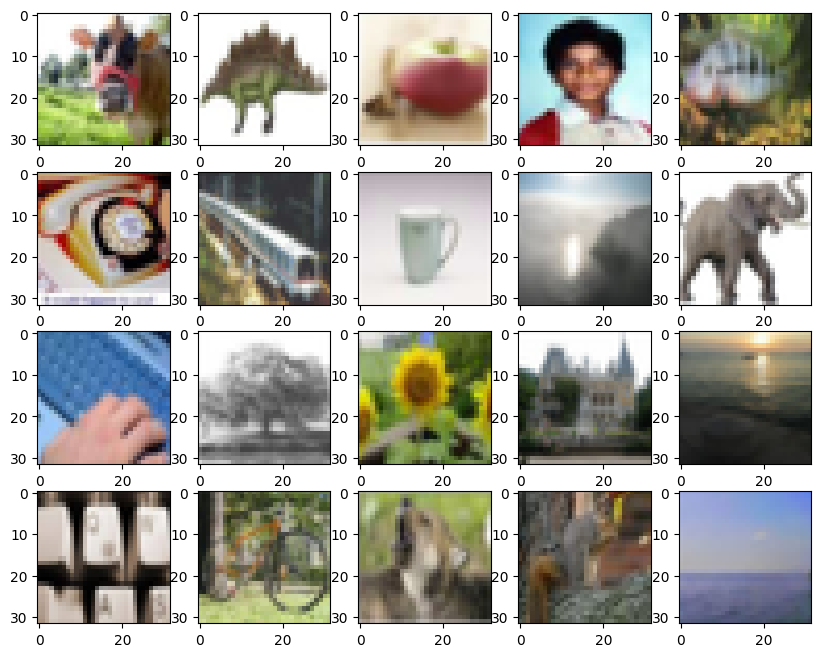

In [ ]:
plt.figure(figsize=(10,10))
for image in range(20):
  plt.subplot(5,5,image+1)
  plt.imshow(X_train[image])

# Normalization

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
model=Sequential()

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(512,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                        

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

data_generator=datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history=model.fit(data_generator,epochs=150,validation_data=(X_test,y_test))
# history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/150
1563/1563 [==============================] - 68s 34ms/step - loss: 4.1970 - accuracy: 0.0780 - val_loss: 3.6409 - val_accuracy: 0.1376
Epoch 2/150
1563/1563 [==============================] - 51s 32ms/step - loss: 3.6600 - accuracy: 0.1371 - val_loss: 3.4004 - val_accuracy: 0.1795
Epoch 3/150
1563/1563 [==============================] - 56s 36ms/step - loss: 3.4138 - accuracy: 0.1782 - val_loss: 3.1433 - val_accuracy: 0.2228
Epoch 4/150
1563/1563 [==============================] - 50s 32ms/step - loss: 3.2301 - accuracy: 0.2083 - val_loss: 3.0423 - val_accuracy: 0.2525
Epoch 5/150
1563/1563 [==============================] - 51s 33ms/step - loss: 3.0724 - accuracy: 0.2387 - val_loss: 2.6508 - val_accuracy: 0.3211
Epoch 6/150
1563/1563 [==============================] - 50s 32ms/step - loss: 2.9145 - accuracy: 0.2689 - val_loss: 2.5631 - val_accuracy: 0.3398
Epoch 7/150
1563/1563 [==============================] - 50s 32ms/step - loss: 2.8107 - accuracy: 0.2892 - val_loss: 2

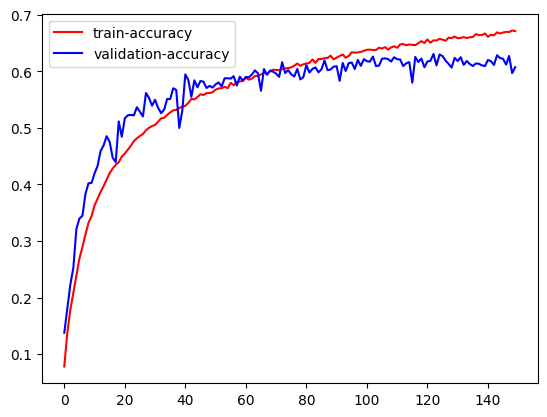

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train-accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation-accuracy')
plt.legend()
plt.show()

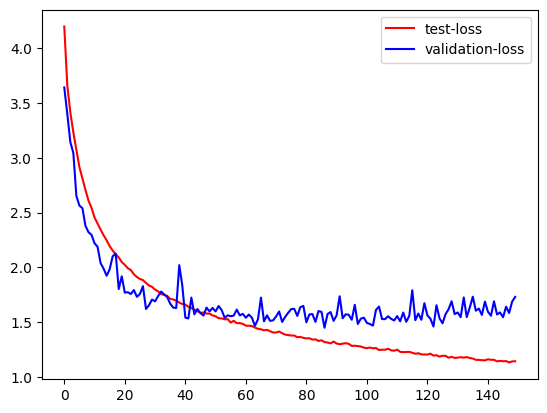

In [ ]:
plt.plot(history.history['loss'],color='red',label='test-loss')
plt.plot(history.history['val_loss'],color='blue',label='validation-loss')
plt.legend()
plt.show()

In [ ]:
history=model.fit(data_generator,initial_epoch=151,epochs=250,validation_data=(X_test,y_test))

Epoch 152/250
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1288 - accuracy: 0.6729 - val_loss: 1.6189 - val_accuracy: 0.6216
Epoch 153/250
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1380 - accuracy: 0.6729 - val_loss: 1.6058 - val_accuracy: 0.6124
Epoch 154/250
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1310 - accuracy: 0.6704 - val_loss: 1.6888 - val_accuracy: 0.6230
Epoch 155/250
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1247 - accuracy: 0.6752 - val_loss: 1.7323 - val_accuracy: 0.6190
Epoch 156/250
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1233 - accuracy: 0.6761 - val_loss: 1.5880 - val_accuracy: 0.6165
Epoch 157/250
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1216 - accuracy: 0.6741 - val_loss: 1.5666 - val_accuracy: 0.6250
Epoch 158/250
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1221 - accuracy: 0.6761

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("Restored model, accuracy: {:5.2f}%".format(100 * test_acc))

313/313 [==============================] - 2s 7ms/step - loss: 1.7371 - accuracy: 0.6331
Restored model, accuracy: 63.31%


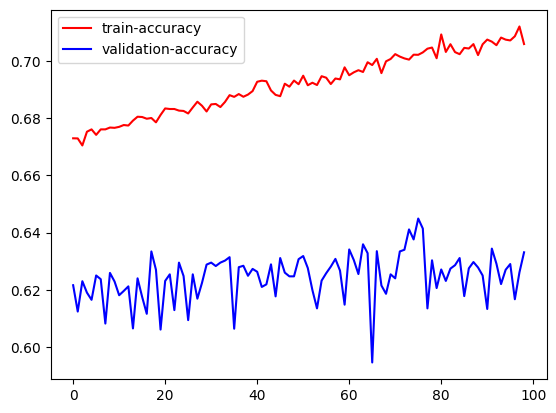

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train-accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation-accuracy')
plt.legend()
plt.show()

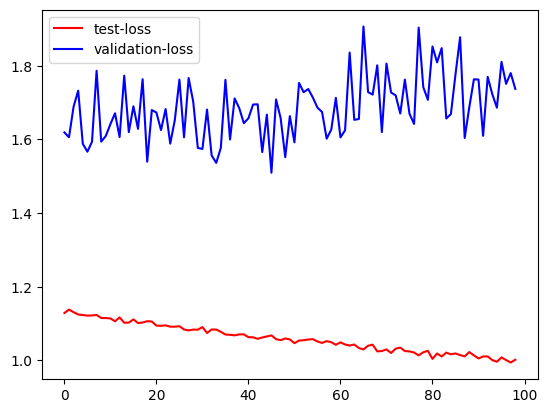

In [ ]:
plt.plot(history.history['loss'],color='red',label='test-loss')
plt.plot(history.history['val_loss'],color='blue',label='validation-loss')
plt.legend()
plt.show()

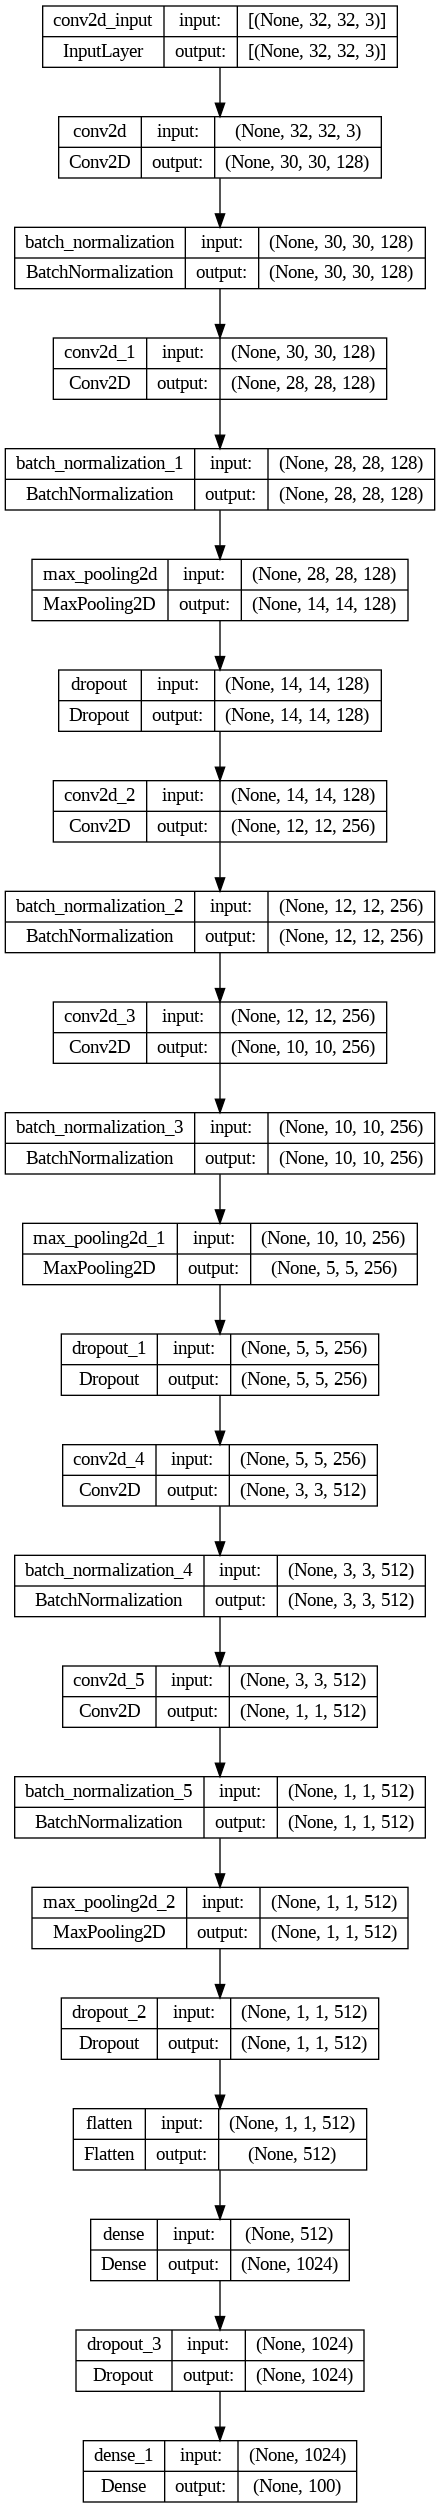

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='conv2d_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.save('my_model.keras')